In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
%matplotlib inline
%matplotlib notebook

In [2]:
import types
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

client_c4e868c5894b4e2dbf342c0402d7bba3 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='VvrkqAArJLW55GlmHldRltN812dp9WR5ukxZ6Hqo-2b6',
    ibm_auth_endpoint="https://iam.eu-gb.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_c4e868c5894b4e2dbf342c0402d7bba3.get_object(Bucket='dataanalysisusingpython-donotdelete-pr-daxyvkifemdjuc',Key='Date.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_date = pd.read_csv(body)
#Reading Sales data into data frame
body = client_c4e868c5894b4e2dbf342c0402d7bba3.get_object(Bucket='dataanalysisusingpython-donotdelete-pr-daxyvkifemdjuc',Key='Sales.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_sales = pd.read_csv(body)


df_sales.head()
df_sales['transaction timestamp']= df_sales['transaction timestamp'].astype('datetime64[ns]') 

In [3]:
df_sales.head()

,transaction id,product id,product description,quantity sold,transaction timestamp,unit price,customer id,transaction country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
#Cleaning and Formatting Timestamp
import datetime
Month = df_sales['transaction timestamp'].dt.month
Year=df_sales['transaction timestamp'].dt.year

In [5]:
df_sales.insert(4,"Month",Month,True)
df_sales.insert(5,"Year",Year,True)

In [6]:
x=df_sales['quantity sold']
y=df_sales['unit price']
temp=x*y
temp
df_sales.insert(8,"Total Amount",temp,True)

In [7]:
df_sales.head()

,transaction id,product id,product description,quantity sold,Month,Year,transaction timestamp,unit price,Total Amount,customer id,transaction country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12,2010,2010-12-01 08:26:00,2.55,15.30,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12,2010,2010-12-01 08:26:00,3.39,20.34,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12,2010,2010-12-01 08:26:00,2.75,22.00,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12,2010,2010-12-01 08:26:00,3.39,20.34,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12,2010,2010-12-01 08:26:00,3.39,20.34,17850.0,United Kingdom


In [8]:
df_mq=pd.DataFrame({'Month':df_sales["Month"],'quantity sold':df_sales["quantity sold"]})
df_mqgrpd=df_mq.sort_values(['quantity sold'],ascending=False).groupby('Month').sum()
df_mta=pd.DataFrame({'Month':df_sales["Month"],'Total Amount':df_sales["Total Amount"]})
df_mtagrpd=df_mta.sort_values(['Total Amount'],ascending=False).groupby('Month').sum()

In [9]:
df_mqgrpd

,quantity sold
Month,
1,308966
2,277989
3,351872
4,289098
5,380391
6,341623
7,391116
8,406199
9,549817


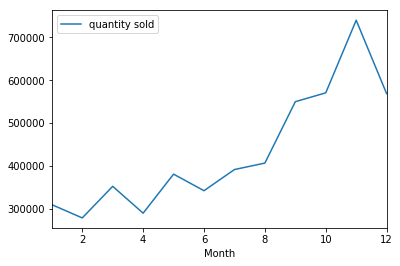

In [10]:
df_mqgrpd.plot.line()

In [11]:
df_mtagrpd

,Total Amount
Month,
1,5.600003e+05
2,4.980627e+05
3,6.832671e+05
4,4.932071e+05
5,7.233335e+05
6,6.911231e+05
7,6.813001e+05
8,6.826805e+05
9,1.019688e+06


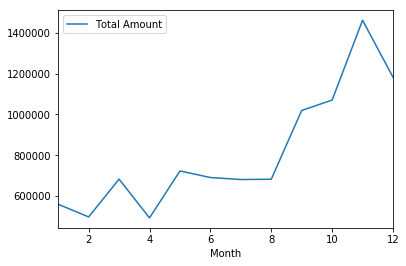

In [12]:
df_mtagrpd.plot.line()

In [13]:
import numpy as np
from sklearn.linear_model import LinearRegression
features=df_sales[["Month","Year","quantity sold"]]
Y=df_sales["Total Amount"]
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]
pipe=Pipeline(Input)
pipe
pipe.fit(features,Y)
pipe.score(features,Y)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


0.8704309259868102

In [14]:
#Finding Nan Data
df_sales.isnull().sum()

transaction id                0
product id                    0
product description        1454
quantity sold                 0
Month                         0
Year                          0
transaction timestamp         0
unit price                    0
Total Amount                  0
customer id              135080
transaction country           0
dtype: int64

In [15]:
df_sales['product description'].replace(np.nan,"Not Mentioned", inplace=True)
df_sales['customer id'].replace(np.nan,10.01, inplace=True)
df_sales.isnull().sum()

transaction id           0
product id               0
product description      0
quantity sold            0
Month                    0
Year                     0
transaction timestamp    0
unit price               0
Total Amount             0
customer id              0
transaction country      0
dtype: int64

In [16]:
Date=df_sales["transaction timestamp"].dt.date
df_sales.insert(4,"Date",Date,True)

In [17]:
Day=df_sales["transaction timestamp"].dt.weekday_name
df_sales.insert(5,"Day",Day,True)

In [18]:
df_dq=pd.DataFrame({'Day':df_sales["Day"],'quantity sold':df_sales["quantity sold"]})
df_dta=pd.DataFrame({'Day':df_sales["Day"],'Total Amount':df_sales["Total Amount"]})

In [19]:
df_dqgrpd=df_dq.sort_values(['quantity sold'],ascending=False).groupby('Day').sum()
df_dqgrpd

,quantity sold
Day,
Friday,794440
Monday,815354
Sunday,467732
Thursday,1167823
Tuesday,961543
Wednesday,969558


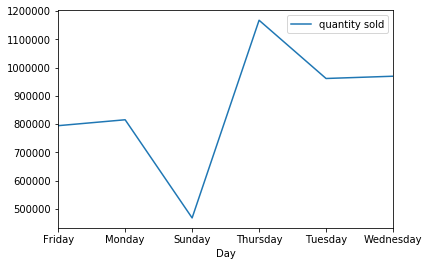

In [20]:
df_dqgrpd.plot.line()

In [21]:
df_dtagrpd=df_dta.sort_values(['Total Amount'],ascending=False).groupby('Day').sum()
df_dtagrpd

,Total Amount
Day,
Friday,1.540611e+06
Monday,1.588609e+06
Sunday,8.056789e+05
Thursday,2.112519e+06
Tuesday,1.966183e+06
Wednesday,1.734147e+06


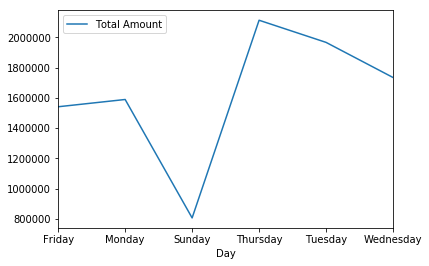

In [22]:
df_dtagrpd.plot.line()

In [23]:
df_Productgrp=df_sales.groupby(['product description','quantity sold','Total Amount','transaction country'],as_index=False).mean()

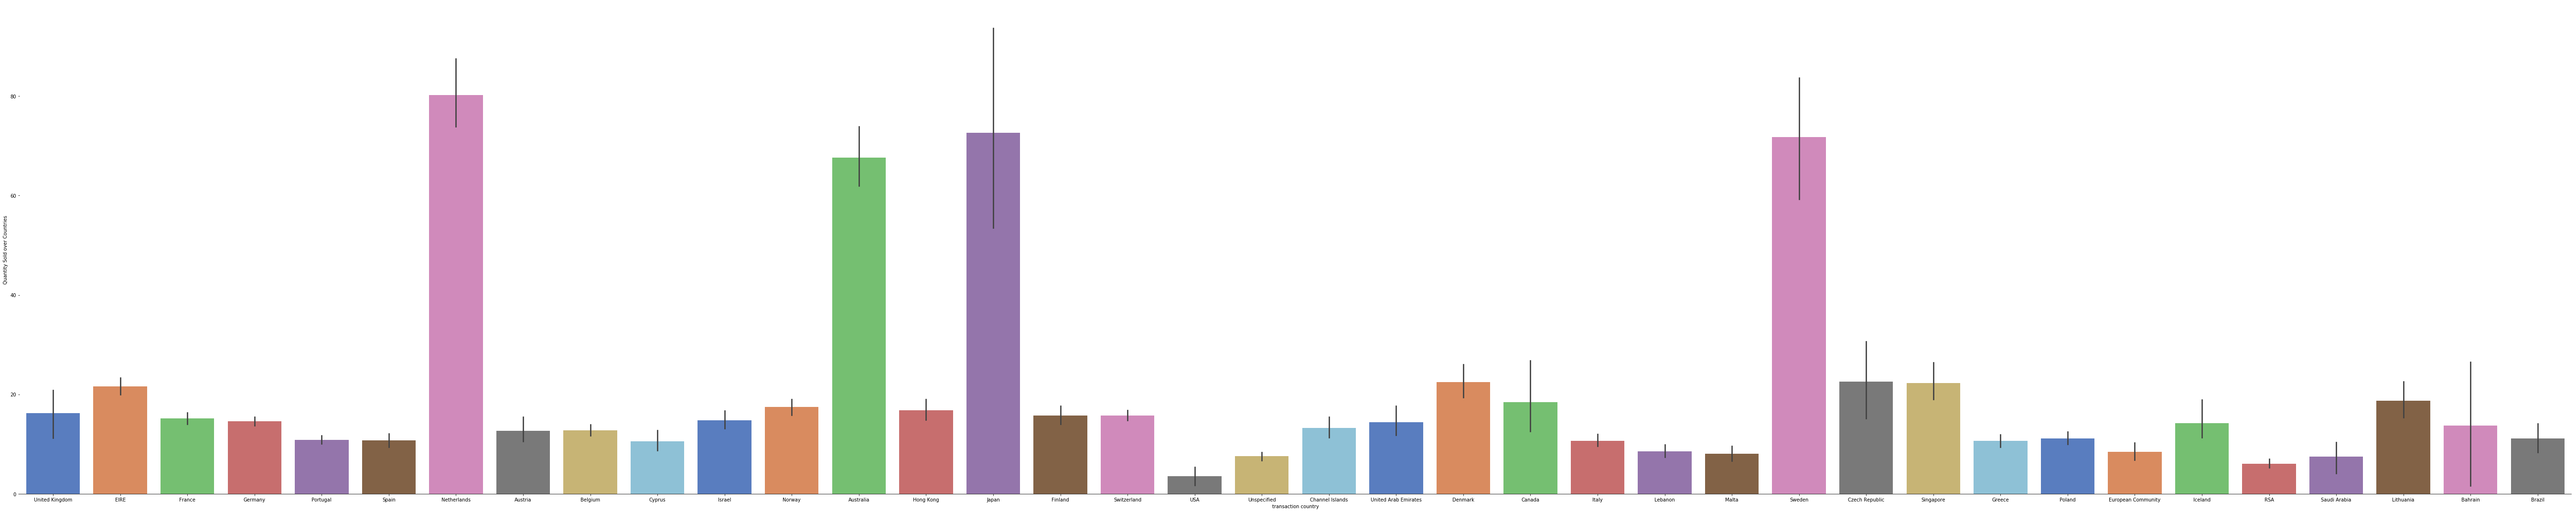

In [24]:
g = sns.catplot(x="transaction country", y="quantity sold", data=df_Productgrp,height=15, kind="bar", legend=True, legend_out=True,aspect=5,palette="muted")
g.despine(left=True)
g.set_ylabels("Quantity Sold over Countries")

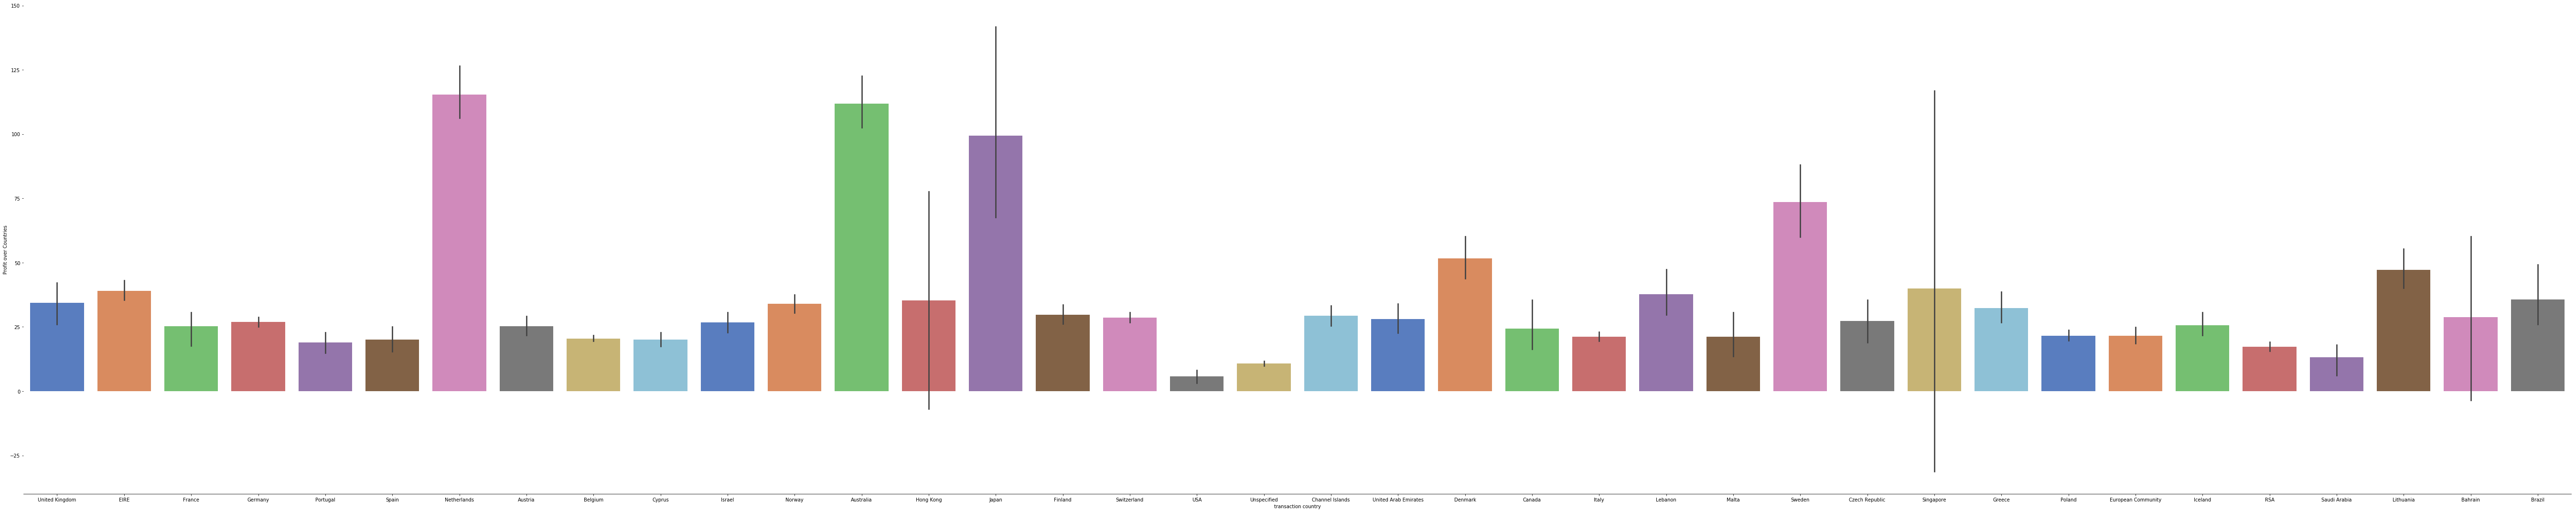

In [25]:
g = sns.catplot(x="transaction country", y="Total Amount", data=df_Productgrp,height=15, kind="bar", legend=True,aspect=5,palette="muted")
g.despine(left=True)
g.set_ylabels("Profit over Countries")

In [26]:
df_customer=pd.DataFrame({'transaction country':df_sales["transaction country"],'product description':df_sales["product description"],'customer id':df_sales["customer id"],"Total Amount":df_sales["Total Amount"],"quantity sold":df_sales["quantity sold"]})
df_customer.sort_values(['Total Amount'],ascending=False).groupby('transaction country').head(1)

,transaction country,product description,customer id,Total Amount,quantity sold
540421,United Kingdom,"PAPER CRAFT , LITTLE BIRDIE",16446.00,168469.60,80995
421601,Netherlands,RABBIT NIGHT LIGHT,14646.00,4992.00,2400
422351,France,Manual,12536.00,4161.06,1
406406,Singapore,Manual,12744.00,3949.32,1
19871,Japan,ROUND SNACK BOXES SET OF 4 FRUITS,12755.00,3794.40,1488
347948,Hong Kong,Manual,10.01,2653.95,1
285366,EIRE,RED RETROSPOT CAKE STAND,14156.00,2365.20,216
468139,Australia,RABBIT NIGHT LIGHT,12415.00,1718.40,960
248803,Spain,CHILDRENS CUTLERY POLKADOT BLUE,12557.00,1350.00,360
201553,Portugal,Manual,12757.00,1241.98,1


In [27]:
df_customer.sort_values(['quantity sold'],ascending=False).groupby('transaction country').head(1)

,transaction country,product description,customer id,Total Amount,quantity sold
540421,United Kingdom,"PAPER CRAFT , LITTLE BIRDIE",16446.00,168469.60,80995
421601,Netherlands,RABBIT NIGHT LIGHT,14646.00,4992.00,2400
511421,Japan,RABBIT NIGHT LIGHT,12798.00,3651.60,2040
6365,EIRE,ASSORTED INCENSE PACK,14156.00,230.40,1440
321304,Australia,MINI PAINT SET VINTAGE,12415.00,633.60,1152
423711,France,RABBIT NIGHT LIGHT,12678.00,1632.48,912
119154,Sweden,12 PENCILS SMALL TUBE RED RETROSPOT,17404.00,499.20,768
187574,Germany,ASSORTED COLOURS SILK FAN,12590.00,390.00,600
174045,Canada,RETRO COFFEE MUGS ASSORTED,17443.00,534.24,504
90868,Channel Islands,RAIN PONCHO,14935.00,264.55,407


In [28]:
df_cm=pd.DataFrame({'Month':df_sales["Month"],'customer id':df_sales["customer id"].nunique()})
df_cmgrpd=df_cm.sort_values(['customer id'],ascending=False).groupby('Month').count()
df_cmgrpd

,customer id
Month,
1,35147
2,27707
3,36748
4,29916
5,37030
6,36874
7,39518
8,35284
9,50226


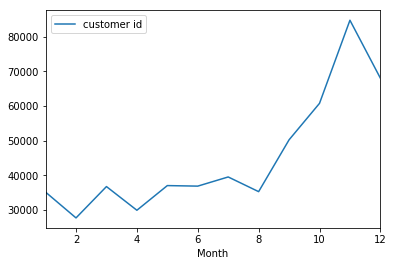

In [29]:
df_cmgrpd.plot.line()

In [30]:
df_cd=pd.DataFrame({'Day':df_sales["Day"],'customer id':df_sales["customer id"].nunique()})
df_cdgrpd=df_cd.sort_values(['customer id'],ascending=False).groupby('Day').count()
df_cdgrpd

,customer id
Day,
Friday,82193
Monday,95111
Sunday,64375
Thursday,103857
Tuesday,101808
Wednesday,94565


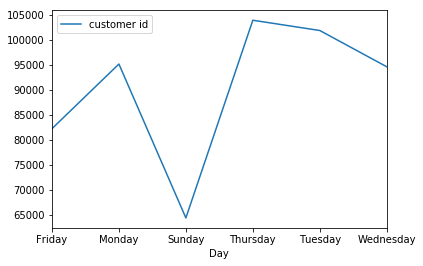

In [31]:
df_cdgrpd.plot.line()